# -------------------------FINAL MACHINE LEARNING PROJECT-------------------------------

# TOPIC:                                                                                                             

# Predicting the profitability of commercial banks in Vietnam and clustering banks using machine learning

********************************************************************************************************************************

# I) Introducing the problem

Banks play an important role as financial intermediaries in the economy, pooling idle funds to meet the capital needs of organizations and individuals. Therefore, the financial health of banks is very important for a country’s economy. A weak banking system can lead to major disasters for any financial system. This has been proven in financial crises such as those in 1997 or 2008, when not only the banking systems of crisis-stricken countries collapsed, but also their entire financial systems were under pressure. Therefore, developing a healthy and efficient banking system is a major concern for countries to this day.

Vietnam’s financial system is a bank-based financial system with the long-standing and significant role of banks in providing capital to the economy. With the complicated development of the Covid-19 epidemic starting at the end of 2019 and early 2020 until now, it has had a huge impact on all aspects from health, economy, social life, and the banking industry has also been significantly affected. Thanks to the strong development of digital technology in the 4.0 era, many convenient products have been developed to ensure that transactions always take place continuously, maintain high stability, save time and costs as well as ensure safety and bring positive profits to help the banking system overcome some difficulties from the crisis. However, with increasing globalization and international integration, banks not only face internal risks but are also affected by external risks. Therefore, commercial banks in particular and financial institutions in general are increasingly concerned about profitability and operational efficiency - which they can control - in order to stand firm in the market.

From there, the author decided to apply machine learning to predict the profitability of commercial banks in Viet Nam. The use of machine learning models will help banks save time, cost and effort to monitor their operations in the best way. In addition, the author also clusters banks into groups with different levels of profitability to gain a deeper insight into the issue to provide some useful policy implications for bank managers to increase profitability.

# II) About Data

The data is taken from the Vietnamese banking database provided by Thanh Ngo and Tu Le, extracted from annual reports and financial reports of individual banks. In this project, the author uses data from 27 commercial banks in Vietnam from 2010 to 2020 after removing banks that do not have complete data for the mentioned period. The reason for choosing the period from 2010 is to eliminate the impact of the 2008 financial crisis in order to more accurately identify the factors affecting the profitability of banks. Moreover, starting from 2010 with the issuance of Circular No. 13/TT-NHNN replacing Decision 457/2005/QD-NHNN, raising the minimum capital adequacy ratio to 9% and the calculation method has gradually approached Basel II, which is a prerequisite for commercial banks in Vietnam to implement Basel II regulations and upgrade management standards according to international practices. Therefore, the results in this period can suggest some useful policy implications for commercial banks as well as policy makers in increasing the profitability of banks and meeting new management requirements.

#The description of variables: 

Based on a review of previous studies on the factors affecting the profitability of commercial banks, the author decided to choose ROA as the target variable and 10 features that are expected to affect the profitability of banks. ROA indicates the ability of the board of directors to convert the bank’s assets into net income. This is a tool to measure the effectiveness of capital allocation and resource management of banks and evaluate the profitability of assets.

Target variable:

- ROA: Return on Assets (Net Income / Total Assets) 

Features:

- ER: Employee Ratio (Number of employees / Total employees of all available banks) 

- BR: Branch Ratio (Number of Branches / Total branches of all available banks) 

- Size: Bank size (Logarithm of total assets) 

- ETA: Equity to Total Assets Ratio (total equity / total assets) 

- NPLR: Non-Performing Loans Ratio (Non-performing Loans / total loans) 

- CIR: Cost to Income Ratio (total operating expenses / total income) 

- LLPR: Loan Loss Provisions Ratio (Loan Loss Provisions / total loans)

- LPROD: Labor productivity (Profits After Tax / Number of employees) 

- TD/TA: Deposit Activity (total deposits / total assets) 

- TL/TA: Lending Activity (total loans / total assets)

# III) About models

In this project, The models chosen for use include: linear regression, decision tree regression, random forest regression, SVM, KNeighborsRegressor and Kmeans. The reason for choosing the above algorithms is because they are parts of the Machine Learning course curriculum and the output variable is continuous, so regression algorithms will be chosen.

# IV) Code

In [ ]:
pip install pandas-profiling[notebook]

In [25]:
#Import library
import pandas as pd 
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt 

# Importing data

In [98]:
data=pd.read_excel("C:\\Users\\ASUS\\Documents\\Lương Thị Mỹ Tâm -K204141929 -ML.xlsx")
data

Bank Code  Year       ROA        ER        BR       Size        ETA  \
0         ABB  2010  1.305116       NaN  0.000554  17.453510  12.237603   
1         ABB  2011  0.739123  0.015506  0.007212  17.542215  11.369445   
2         ABB  2012  0.867764  0.015658  0.007651  17.644449  10.649538   
3         ABB  2013  0.243914  0.013966  0.007783  17.869514   9.968253   
4         ABB  2014  0.173384  0.014592  0.008158  18.027117   8.471635   
..        ...   ...       ...       ...       ...        ...        ...   
292       VPB  2016  2.657748  0.104587       NaN  18.813124  11.601784   
293       VPB  2017  3.417531  0.114561       NaN  19.054410  15.756819   
294       VPB  2018  3.219002  0.099042  0.026893  19.247067  15.207599   
295       VPB  2019  3.124147  0.093847  0.022181  19.392976  15.964314   
296       VPB  2020  3.424651  0.072240  0.022897  19.532809  17.361577   

         NPLR        CIR      LLPR       LPROD     TD/TA     TL/TA  
0    1.063410  80.819330  1.063410         NaN  0.617043  0.522860  
1    1.596018  91.392149  1.596018  114.441297  0.487448  0.479407  
2    2.835047  88.742184  2.205230  144.356471  0.624467  0.407613  
3    6.742461  95.498623  2.763470   54.544820  0.644857  0.410336  
4    3.968844  96.240567  1.823933   43.195347  0.668536  0.384929  
..        ...        ...       ...         ...       ...       ...  
292  2.907970  79.031474  1.444609  226.321102  0.836067  0.977130  
293  3.394181  75.337293  1.723036  270.325149  0.708633  0.969244  
294  3.498917  75.982998  1.606930  268.167560  0.747691  0.971368  
295  3.420720  77.174390  1.588005  305.009342  0.809187  0.972706  
296  3.412531  73.124641  1.546229  496.105950  0.767647  0.956373  

[297 rows x 13 columns]

# Checking data

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Bank Code  297 non-null    object 
 1   Year       297 non-null    int64  
 2   ROA        293 non-null    float64
 3   ER         247 non-null    float64
 4   BR         214 non-null    float64
 5   Size       294 non-null    float64
 6   ETA        294 non-null    float64
 7   NPLR       274 non-null    float64
 8   CIR        296 non-null    float64
 9   LLPR       294 non-null    float64
 10  LPROD      247 non-null    float64
 11  TD/TA      294 non-null    float64
 12  TL/TA      294 non-null    float64
dtypes: float64(11), int64(1), object(1)
memory usage: 30.3+ KB


In [100]:
data.duplicated().sum()

0

In [101]:
data.isnull().sum()

Bank Code     0
Year          0
ROA           4
ER           50
BR           83
Size          3
ETA           3
NPLR         23
CIR           1
LLPR          3
LPROD        50
TD/TA         3
TL/TA         3
dtype: int64

Total   Percent
BR        83  0.279461
ER        50  0.168350
LPROD     50  0.168350
NPLR      23  0.077441
ROA        4  0.013468

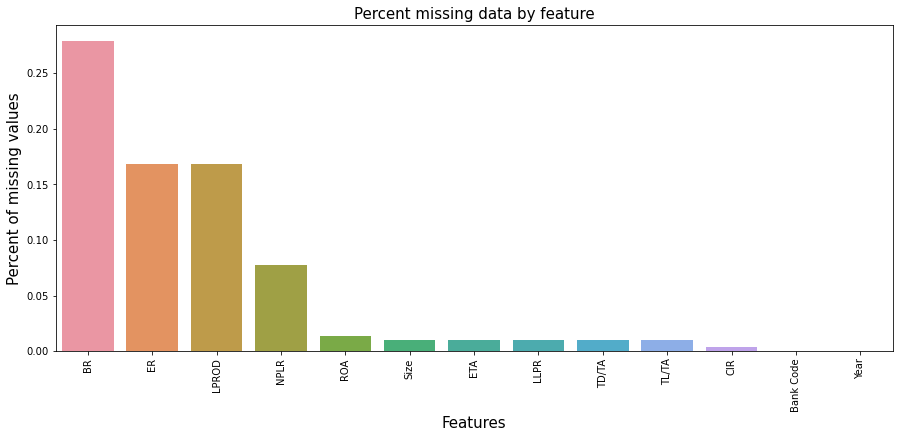

In [102]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.head()

Comment:

The dataset consists of 297 rows and 13 columns. All columns are numerical data except for the Bank Code column. The dataset has no duplicates but many columns contain missing values. Based on the above chart, we see that the BR column has the highest percentage of missing values at 27%. Therefore, we need to address this issue by replacing median values and columns with missing value percentages below 3% will be removed missing values.

   

# Data processing

In [103]:
# Filling missing data
data['BR'].fillna(data['BR'].median(), inplace=True)
data['LPROD'].fillna(data['LPROD'].median(), inplace=True)
data['ER'].fillna(data['ER'].median(), inplace=True)
data['NPLR'].fillna(data['NPLR'].median(), inplace=True)
#data['LLPR'].fillna(data['LLPR'].median(), inplace=True)

#Dropping missing data
data = data.dropna()

In [104]:
data.isnull().sum()

Bank Code    0
Year         0
ROA          0
ER           0
BR           0
Size         0
ETA          0
NPLR         0
CIR          0
LLPR         0
LPROD        0
TD/TA        0
TL/TA        0
dtype: int64

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290 entries, 0 to 296
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Bank Code  290 non-null    object 
 1   Year       290 non-null    int64  
 2   ROA        290 non-null    float64
 3   ER         290 non-null    float64
 4   BR         290 non-null    float64
 5   Size       290 non-null    float64
 6   ETA        290 non-null    float64
 7   NPLR       290 non-null    float64
 8   CIR        290 non-null    float64
 9   LLPR       290 non-null    float64
 10  LPROD      290 non-null    float64
 11  TD/TA      290 non-null    float64
 12  TL/TA      290 non-null    float64
dtypes: float64(11), int64(1), object(1)
memory usage: 31.7+ KB


In [106]:
data1=pd.DataFrame(data)

In [107]:
#remove bank code and year columns
data1 = data1.iloc[:,2:]
data1

ROA        ER        BR       Size        ETA      NPLR        CIR  \
0    1.305116  0.025234  0.000554  17.453510  12.237603  1.063410  80.819330   
1    0.739123  0.015506  0.007212  17.542215  11.369445  1.596018  91.392149   
2    0.867764  0.015658  0.007651  17.644449  10.649538  2.835047  88.742184   
3    0.243914  0.013966  0.007783  17.869514   9.968253  6.742461  95.498623   
4    0.173384  0.014592  0.008158  18.027117   8.471635  3.968844  96.240567   
..        ...       ...       ...        ...        ...       ...        ...   
292  2.657748  0.104587  0.014660  18.813124  11.601784  2.907970  79.031474   
293  3.417531  0.114561  0.014660  19.054410  15.756819  3.394181  75.337293   
294  3.219002  0.099042  0.026893  19.247067  15.207599  3.498917  75.982998   
295  3.124147  0.093847  0.022181  19.392976  15.964314  3.420720  77.174390   
296  3.424651  0.072240  0.022897  19.532809  17.361577  3.412531  73.124641   

         LLPR       LPROD     TD/TA     TL/TA  
0    1.063410  192.766537  0.617043  0.522860  
1    1.596018  114.441297  0.487448  0.479407  
2    2.205230  144.356471  0.624467  0.407613  
3    2.763470   54.544820  0.644857  0.410336  
4    1.823933   43.195347  0.668536  0.384929  
..        ...         ...       ...       ...  
292  1.444609  226.321102  0.836067  0.977130  
293  1.723036  270.325149  0.708633  0.969244  
294  1.606930  268.167560  0.747691  0.971368  
295  1.588005  305.009342  0.809187  0.972706  
296  1.546229  496.105950  0.767647  0.956373  

[290 rows x 11 columns]

Comment: 

After processing missing values and removing the two columns Bank Code and Year, the dataset has 290 rows and 11 columns and no missing values.

# EDA

In [108]:
import pandas_profiling as pp

In [109]:
pp.ProfileReport(data1)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Descriptive statistics

In [110]:
data1.describe()

ROA          ER          BR        Size         ETA        NPLR  \
count  290.000000  290.000000  290.000000  290.000000  290.000000  290.000000   
mean     1.087574    0.038083    0.027195   18.610092    9.256588    2.016673   
std      0.955847    0.038113    0.049371    1.189024    4.203856    1.571391   
min     -5.511746    0.003768    0.000140   15.922738    3.497571   -1.383587   
25%      0.467961    0.013986    0.009550   17.748319    6.314672    1.218911   
50%      0.821238    0.025234    0.014660   18.658840    8.178601    1.841649   
75%      1.588444    0.048497    0.022856   19.445113   10.535806    2.444414   
max      4.688205    0.226228    0.458106   21.139793   25.538883   15.812026   

              CIR        LLPR        LPROD       TD/TA       TL/TA  
count  290.000000  290.000000   290.000000  290.000000  290.000000  
mean    83.724122    1.310738   243.950251    0.649772    0.564054  
std     12.054684    0.533086   236.919557    0.132503    0.139898  
min     43.034729   -1.063731 -1695.441286    0.229561    0.147255  
25%     76.389224    1.009192   128.388121    0.566536    0.475854  
50%     85.720409    1.188848   192.766537    0.662515    0.575151  
75%     91.611867    1.522392   310.851000    0.737961    0.665085  
max    153.484807    3.657441  1601.363648    0.893717    0.977130

Comment:

Based on the descriptive statistics table above, we can see that during the period, all variables have positive mean values. The ROA index of commercial banks in Vietnam has a mean value of 1.087. However, the lowest value with ROA is modest at -5.51, while the highest level is 4.68. Labor productivity (LPROD) has the highest mean value of 243.95. Employee Ratio (ER) has a mean value of 0.038 and a slightly larger standard deviation than the average (0.0381). Branch Ratio (BR) has a maximum value of 0.45 and a minimum value of 0.0001 with a standard deviation of 0.049. Bank size (Size) has a mean value of 18.61 with a small standard deviation of 1.189. Equity to Total Assets Ratio (ETA) has a maximum value of 25.53 and a minimum value of 3.49 with a mean value of 9.25. Non-Performing Loans Ratio (NPLR) has a standard deviation of 1.57 with a mean value of 2.01. During the research period, Cost to Income Ratio (CIR) had a mean value of 83.72 with a standard deviation of 12.05. Loan Loss Provisions Ratio (LLPR) had the lowest value of -1.063 and the highest and average values were respectively 3.65 and 1.31. The two variables Deposit Activity (TD/TA) and Lending Activity(TL/TA) have mean values of 0.649 and 0.564 respectively with low standard deviations of 0.132 and 0.139.

# Univariate Analysis

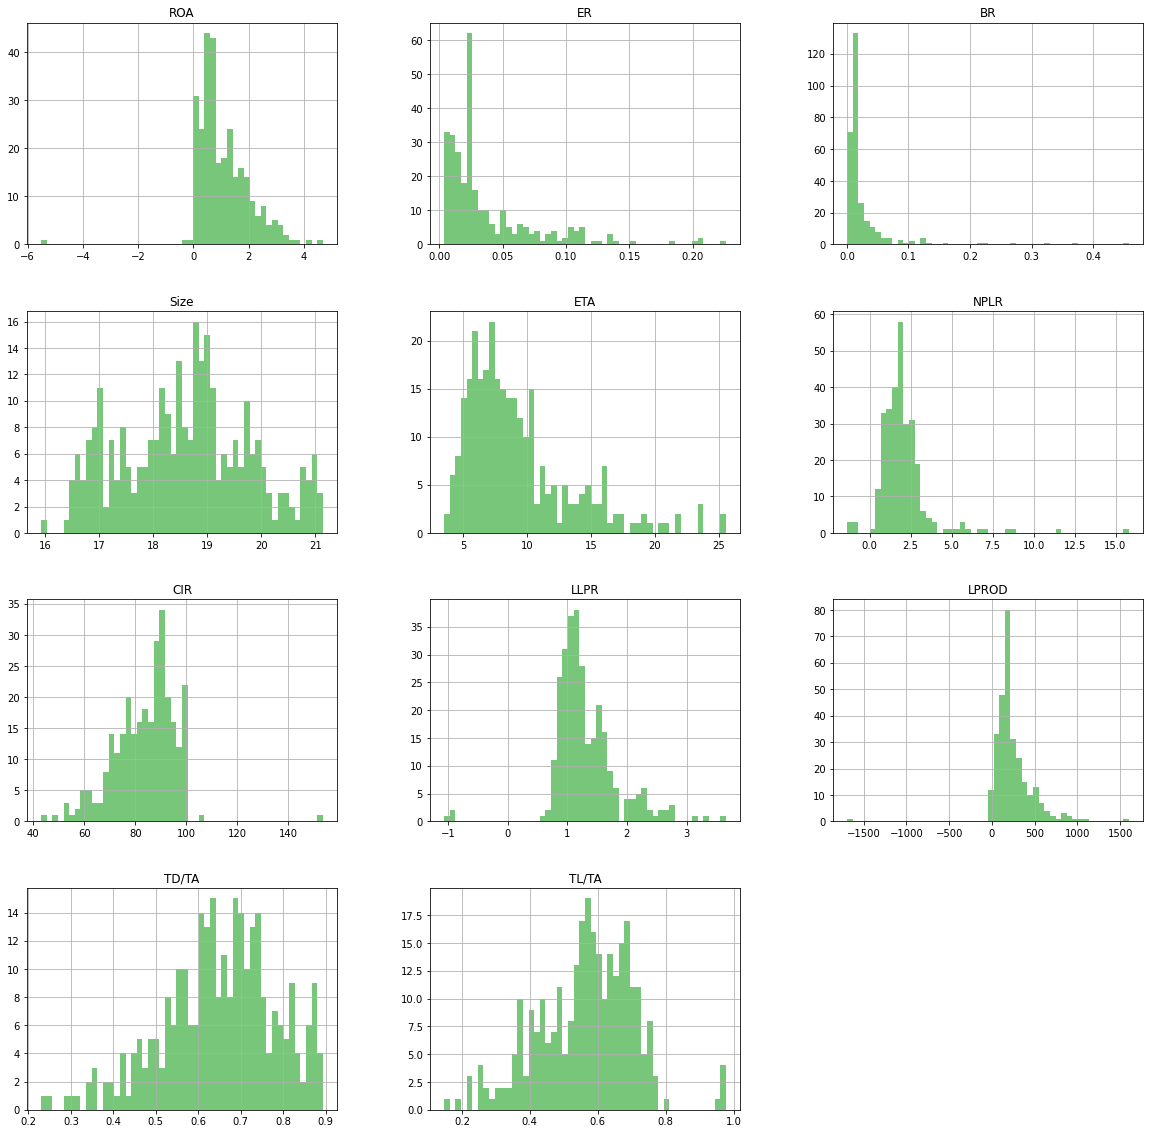

In [111]:
num_col= ['ER','BR','Size','ETA','NPLR','NIM','CIR','LLPR','LPROD','TD/TA','TL/TA']
data1.hist(figsize=(20, 20),bins=50, color = sns.color_palette("YlGn", 1))
plt.show()

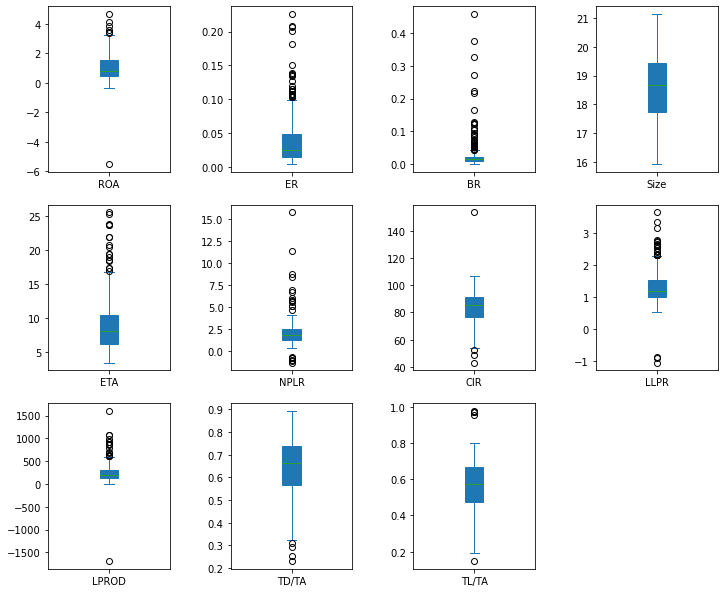

In [112]:
# boxplots
data1.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14), patch_artist=True)
plt.subplots_adjust(wspace=0.5);

# Multivariate Analysis- Numeric columns with target column

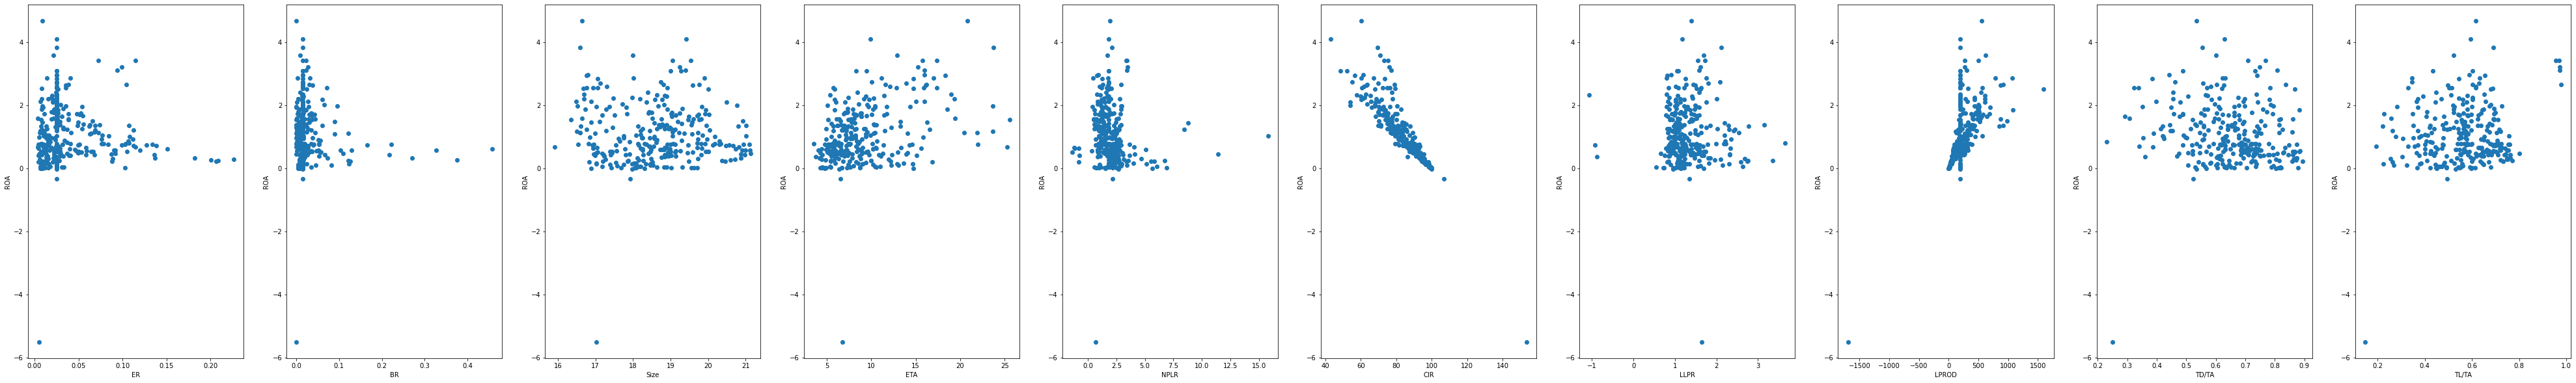

In [113]:
fig, axs = plt.subplots(1, len(data1.columns)-1, figsize=(70, 10))
for i, col in enumerate(data1.columns.drop('ROA')):
    axs[i].scatter(data1[col], data1['ROA'])
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('ROA')
plt.show()

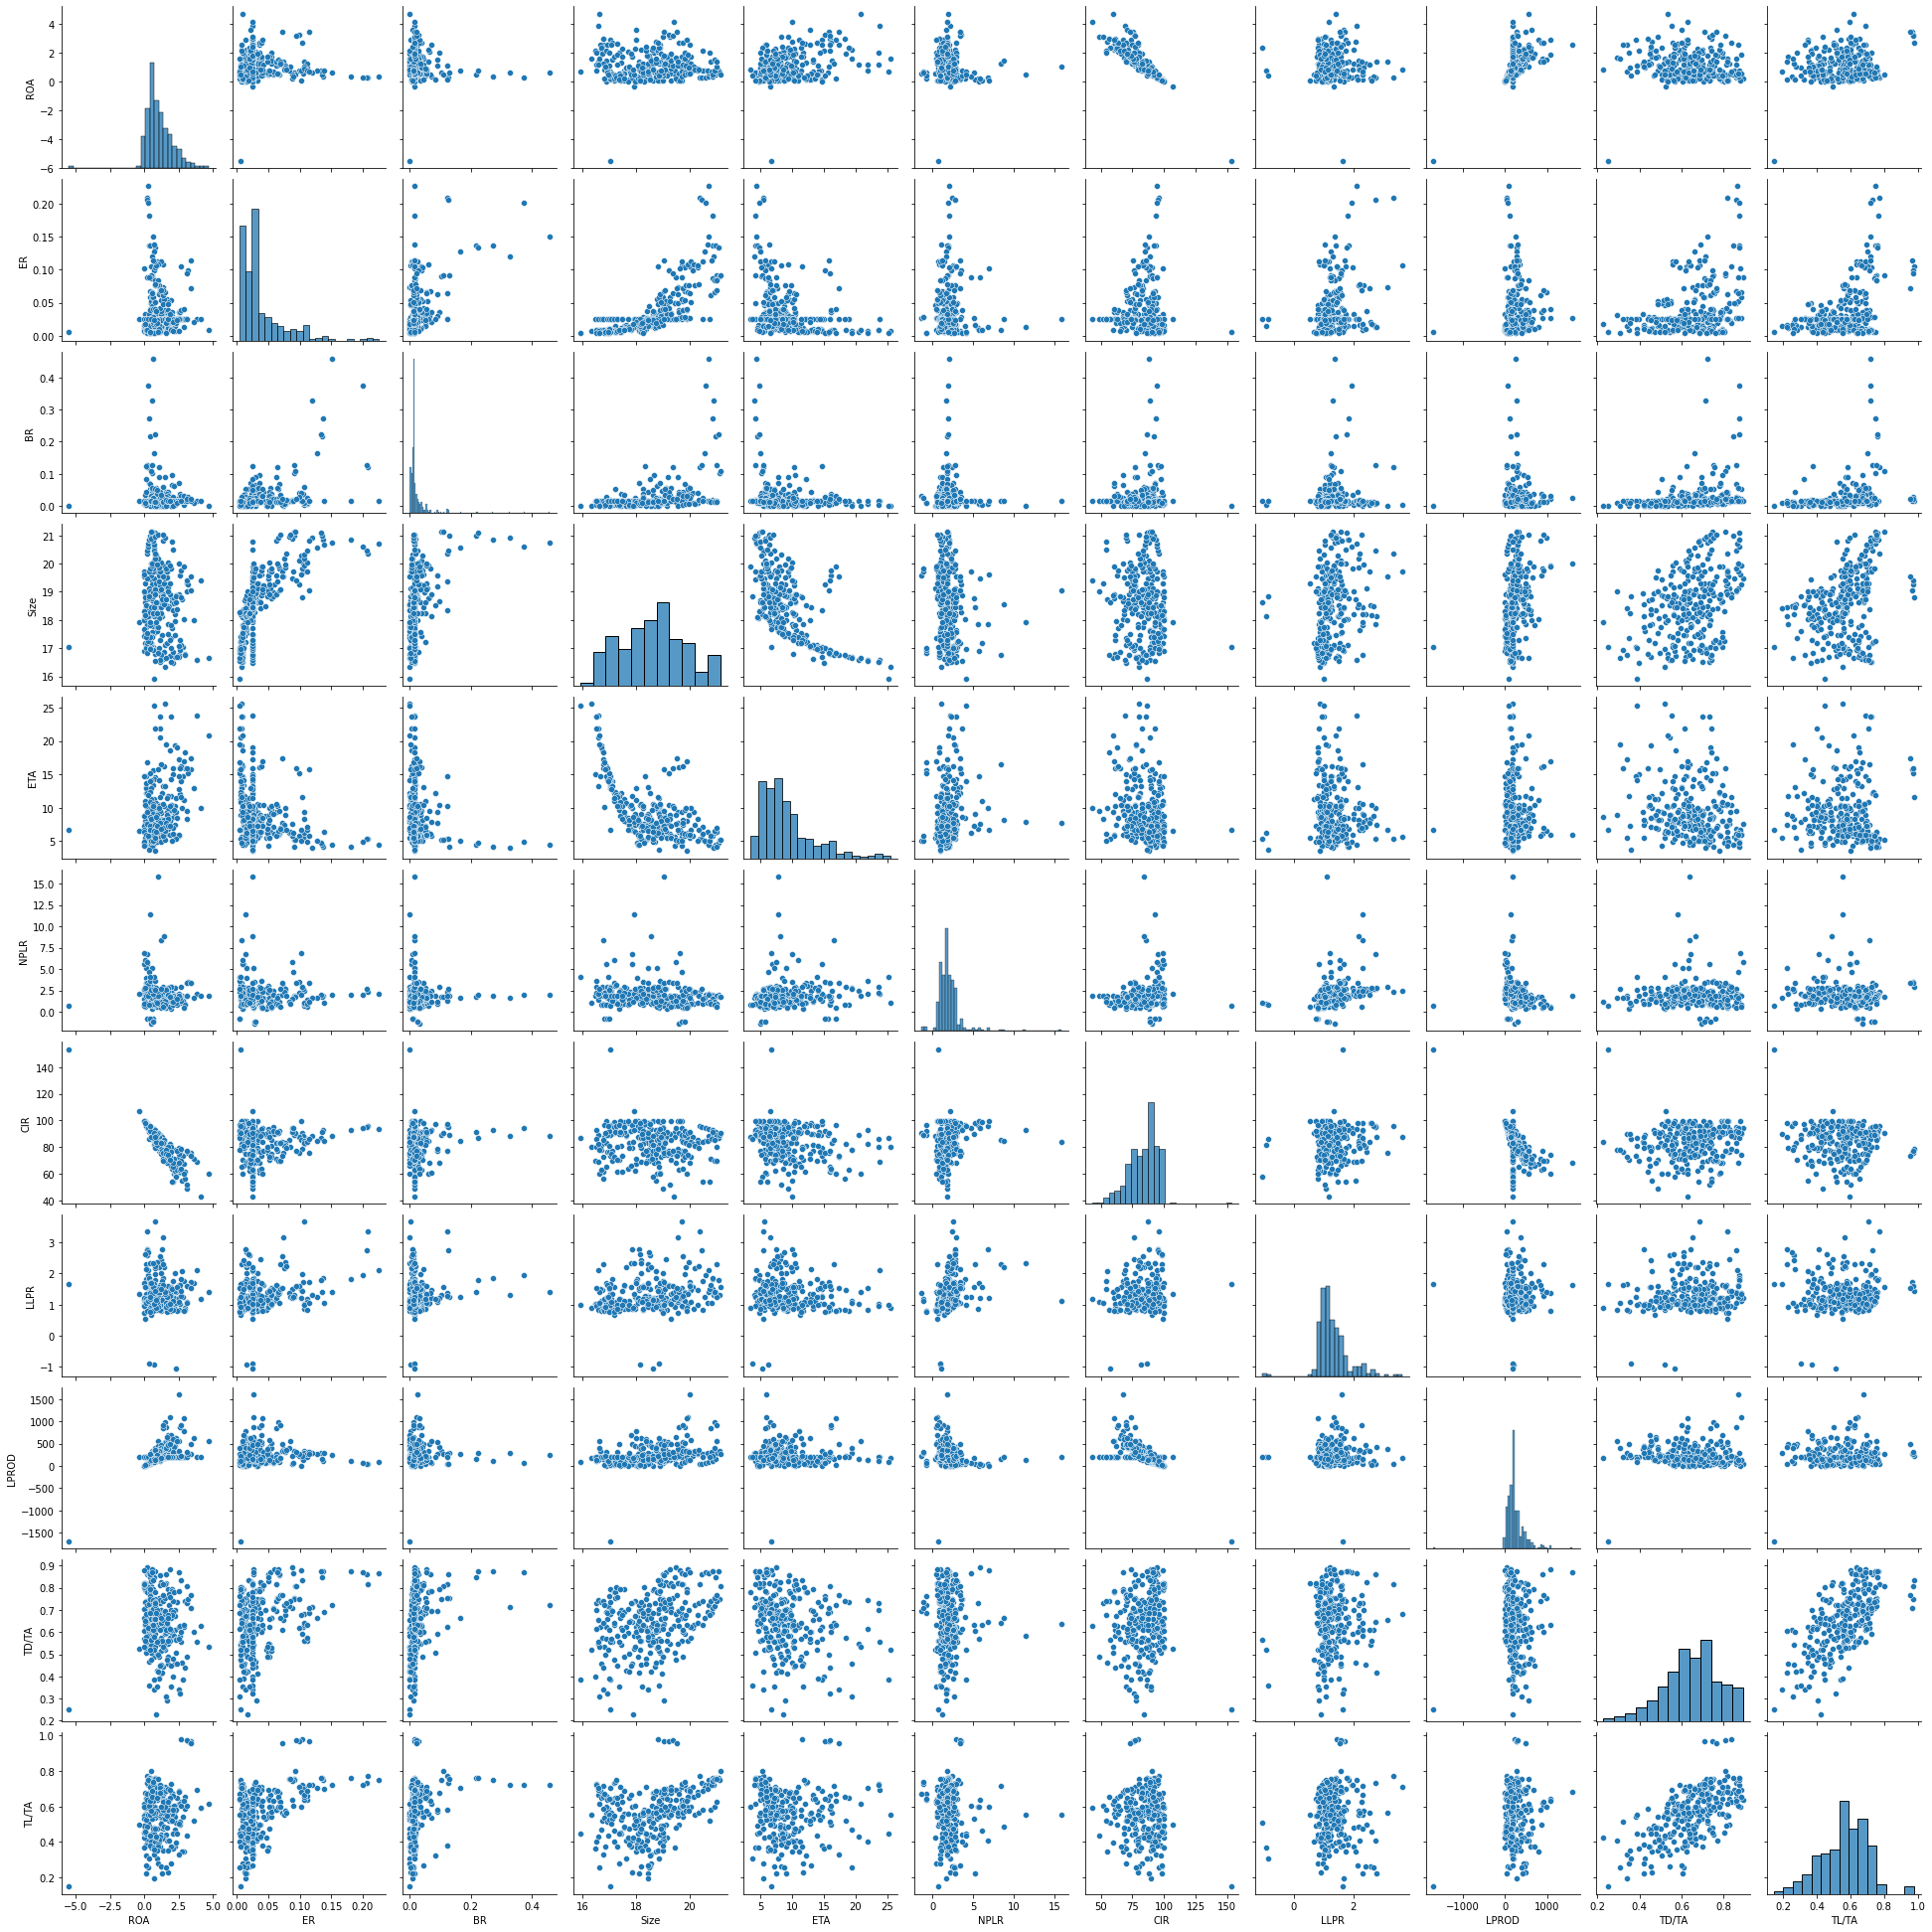

In [114]:
sns.pairplot(data1)

Comment:
    
In general, the distribution of most variables is skewed except for the size variable and there are outliers. Looking at the scatter plots, we can see that some variables clearly show their trends with the target variable.

# Correlation

In [115]:
pd.DataFrame(data1.corr().iloc[:,0])


ROA
ROA    1.000000
ER    -0.042270
BR    -0.102302
Size  -0.052921
ETA    0.380710
NPLR  -0.092946
CIR   -0.907319
LLPR  -0.035896
LPROD  0.627941
TD/TA -0.122241
TL/TA  0.158505

In [116]:
correlation = data1.corr().iloc[1:,0].values

In [117]:
column_selected = [x for x in data1.columns if (x != 'ROA')]
column_selected

['ER', 'BR', 'Size', 'ETA', 'NPLR', 'CIR', 'LLPR', 'LPROD', 'TD/TA', 'TL/TA']

In [118]:
features_importances_corr = pd.DataFrame({'FeatureName': data1[column_selected].columns[0:len(data1[column_selected])-1], 'Pearson Correlation with target': correlation})
features_importances_corr.reindex(features_importances_corr['Pearson Correlation with target'].abs().sort_values(ascending=False).index)

FeatureName  Pearson Correlation with target
5         CIR                        -0.907319
7       LPROD                         0.627941
3         ETA                         0.380710
9       TL/TA                         0.158505
8       TD/TA                        -0.122241
1          BR                        -0.102302
4        NPLR                        -0.092946
2        Size                        -0.052921
0          ER                        -0.042270
6        LLPR                        -0.035896

<AxesSubplot:ylabel='FeatureName'>

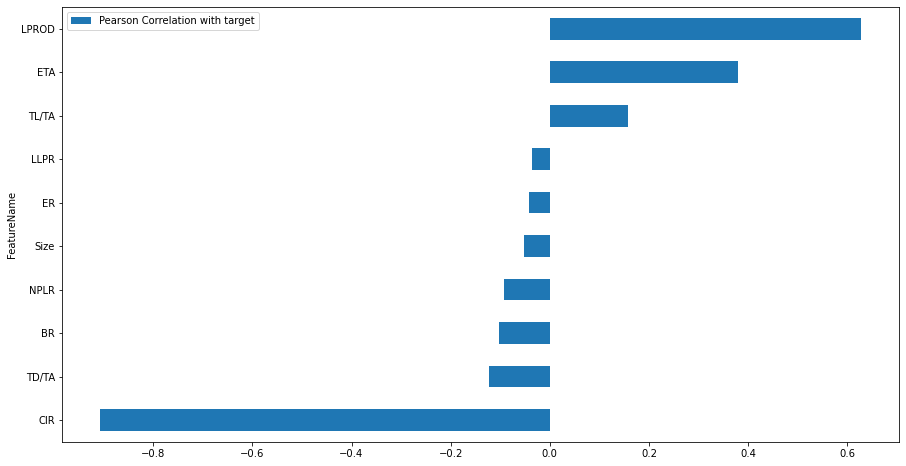

In [119]:
features_importances_corr.sort_values(by = ['Pearson Correlation with target']).plot(figsize=(15,8), x="FeatureName", y = "Pearson Correlation with target", kind="barh")

<AxesSubplot:>

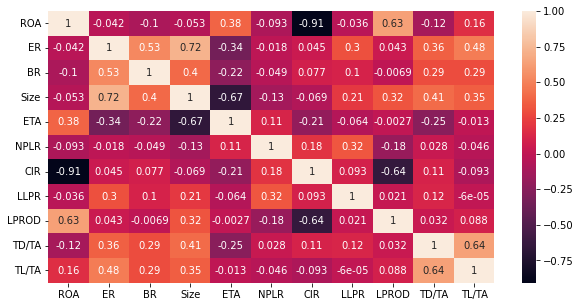

In [120]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(data1.corr(),  ax=ax,annot=True)

Based on the correlation table of the independent variables with the target variable, we see the following relationships:

- Looking at the correlation coefficient, the Pearson correlation chart and the heat map, we can easily see that the CIR variable, which represents the bank’s ability to control costs, is strongly negatively correlated with ROA (-0.907). The smaller this ratio, the better because it takes less cost to generate 1 dong of revenue. In other words, the bank earns more profit, so the return on investment at the bank will be higher. Cost management is very important because only when a bank has good cost management can it increase its profitability, and this coefficient reflects reality because in previous years banks often recruited and expanded their market share, but this also means that if they do not have good management, it will increase costs. Banks that control their operating costs well will achieve higher efficiency and profitability. Conversely, the LPROD variable representing the bank’s labor productivity has a fairly strong positive relationship with ROA (0.627), which may indicate that the higher the company’s labor efficiency, the higher the return on assets.
- The ETA and TL/TA variables have a positive impact on ROA but not too large (0.38 and 0.158). This shows that the higher the ratio of equity to total assets, the higher the efficiency of Vietnamese commercial banks. A high ETA increases the return on equity and also indicates that financing assets with equity reduces risk for shareholders and bank owners. As for the TL/TA variable, it shows that when loan balances increase, the return on assets also increases.
- The TD/TA, BR, NPLR, Size, ER and LLPR columns have a negative impact on ROA but this correlation is low.

=> From here, we can see that there are many variables with weak correlation coefficients, which do not have much impact on the target variable so we will filter out the 5 most important variables to run the model to improve the quality of the model results better. The model will run variables including 5 independent variables CIR column, LPROD column, ETA column, TL/TA column, TD/TA column, and 1 target variable is ROA.

# Using Linear Regression to predict

a) Thoery

Linear Regression is a statistical method used to model the relationship between a dependent variable and one or more independent variables. The goal of linear regression is to find the best line that fits the data so that the value of the dependent variable can be predicted based on the values of the independent variables. In simple linear regression, we have only one independent variable and one dependent variable. In this case, the best line that fits the data can be written as y = a + bx, where a is the y-intercept and b is the slope of the line. In multiple linear regression, we have more than one independent variable. In this case, the model can be written as y = a + b1x1 + b2x2 + … + bkxk, where a is the y-intercept and b1, b2, …, bk are the coefficients of the independent variables. One of the methods for estimating parameters in a linear regression model is OLS (Ordinary Least Squares). This method works by finding the values of the parameters such that the sum of squared errors between predicted and actual values is minimized. Linear regression can be used as a machine learning algorithm to solve problems predicting continuous values. It belongs to supervised learning and is widely used in many different fields.

Strengths:

- Simple and easy to understand: Linear regression is a simple and easy-to-understand algorithm. It can be quickly implemented and does not require much in-depth knowledge of machine learning.

- Effective in predicting: Linear regression can give accurate prediction results in many cases, especially when the data has a linear relationship.

- Easy to interpret: The results of the linear regression model are easy to interpret and explain. This helps users better understand the relationship between independent and dependent variables.

Weaknesses:

- Assumption of a linear relationship: Linear regression only works well when there is a linear relationship between independent and dependent variables. If the data does not have a linear relationship, the prediction results may be inaccurate.

- Does not work well with non-linear data: Linear regression does not work well with non-linear data. In this case, other algorithms such as nonlinear regression or deep learning algorithms may give better results.

- Can be affected by noise: Linear regression can be affected by noise in the data. If the data has many outliers or noise, the prediction results may be inaccurate.

b) Running model

In [276]:
#import library
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn import metrics
scores=[]
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split


In [277]:
target = ['ROA']
features = ['TL/TA','TD/TA','ETA','LPROD','CIR']
#features=['ER','BR','Size','ETA','NPLR','CIR','LLPR','LPROD','TD/TA','TL/TA']

In [278]:
print('Target: ', target)
print('Features: ', features)

Target:  ['ROA']
Features:  ['TL/TA', 'TD/TA', 'ETA', 'LPROD', 'CIR']


In [279]:
X = data1[features].values
y = data1[target].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [280]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [281]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

In [282]:
scores.append({
        'model': 'Linear Regression',
        'r2_score': r2_score(y_test, y_pred),
    'MAE_score' : mean_absolute_error(y_test,y_pred),
    'MSE_score' : mean_squared_error(y_test,y_pred),
    'RMSE_score' : mean_squared_error(y_test,y_pred, squared=False)
    })

pred=y_pred

print('Testing R2 Score: ', round(r2_score(y_test, y_pred),4),
      '\nTesting MAE Score: ', round(mean_absolute_error(y_test,y_pred),4),
      '\nTesting MSE Score: ', round(mean_squared_error(y_test,y_pred),4),
      '\nTesting RMSE Score: ', round(mean_squared_error(y_test,y_pred, squared=False),4))

Testing R2 Score:  0.8756 
Testing MAE Score:  0.233 
Testing MSE Score:  0.096 
Testing RMSE Score:  0.3098


In [284]:
importance_lr = lr.coef_[0] #use coeffcient as importance
features_importances_lr = pd.DataFrame({'FeatureName': data1.loc[:,features].columns, 'Linear Regression Feature Importance': importance_lr})
# features_importances_lr.sort_values(by=['Logistic Regression Feature Importance'], ascending=False)
features_importances_lr.reindex(features_importances_lr['Linear Regression Feature Importance'].abs().sort_values(ascending=False).index)

FeatureName  Linear Regression Feature Importance
4         CIR                             -0.731029
2         ETA                              0.204543
3       LPROD                              0.146071
0       TL/TA                              0.120512
1       TD/TA                             -0.065082

<AxesSubplot:ylabel='FeatureName'>

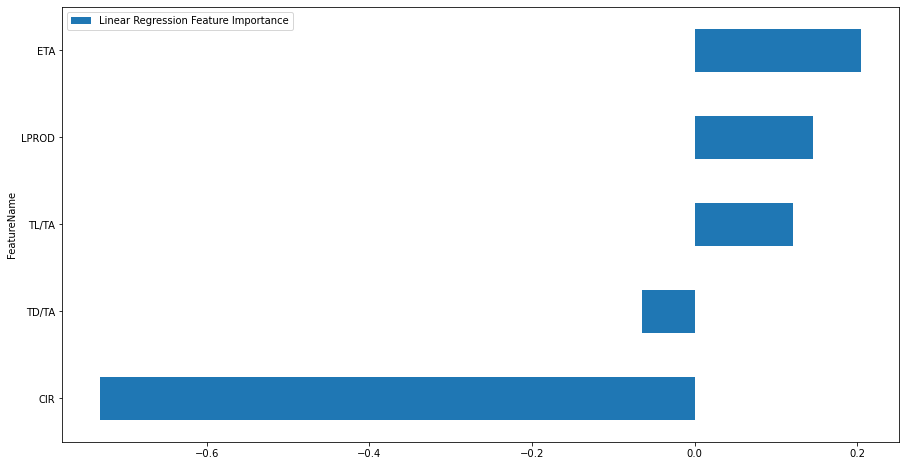

In [285]:
features_importances_lr.sort_values("Linear Regression Feature Importance").plot(figsize=(15,8), x="FeatureName", y=["Linear Regression Feature Importance"], kind="barh")

# Using Decision Tree to predict

a) Thoery

A decision tree is a type of non-parametric supervised learning that can be used for both classification and regression. It has a tree-like structure with a root node, branches, internal nodes, and leaf nodes arranged in a hierarchical manner. A decision tree works by using a divide-and-conquer strategy to identify the optimal split points within a tree. In a decision tree, the data is split into subsets in a top-down, recursive manner until all or most of the records have been assigned to specific class labels. The tree starts with a root node that has no incoming branches. The branches extending from the root node lead to internal nodes, also called decision nodes. These nodes evaluate the available features to form homogeneous subsets, which are represented by leaf nodes or terminal nodes. The leaf nodes represent all possible outcomes within the data set. Decision trees have a wide range of applications including Assessing prospective growth opportunities, Using demographic data to find prospective clients, Data mining, and data classification.

Strengths:

- Decision trees can handle both continuous and categorical variables. 

- They provide a clear indication of which features are most important for prediction or classification. 

- Decision trees can be easily understood, interpreted, and visualized. 

- They require less data preparation compared to other machine learning algorithms. 

- Decision trees are non-parametric, which means that they do not make any assumptions about the distribution of the data or the structure of the classifier. 

Weaknesses:

- Decision trees can be prone to overfitting, especially when the tree is too complex. 

- They may have difficulties handling numerical variables with millions of records due to the time complexity of operating this operation. 

- Decision trees may not perform as well on regression tasks compared to classification tasks. 

b) Running model

In [286]:
DT_regression = DecisionTreeRegressor(random_state = 0)
DT_regression.fit(X_train, y_train.ravel())
y_predDT = DT_regression.predict(X_test)

In [287]:
scores.append({
        'model': 'Decision Tree Regression',
        'r2_score': r2_score(y_test, y_predDT),
    'MAE_score' : mean_absolute_error(y_test,y_predDT),
    'MSE_score' : mean_squared_error(y_test,y_predDT),
    'RMSE_score' : mean_squared_error(y_test,y_predDT, squared=False)
    })

pred=y_predDT

print('Testing R2 Score: ', round(r2_score(y_test, y_predDT),4),
      '\nTesting MAE Score: ', round(mean_absolute_error(y_test,y_predDT),4),
      '\nTesting MSE Score: ', round(mean_squared_error(y_test,y_predDT),4),
      '\nTesting RMSE Score: ', round(mean_squared_error(y_test,y_predDT, squared=False),4))


Testing R2 Score:  0.84 
Testing MAE Score:  0.2243 
Testing MSE Score:  0.1235 
Testing RMSE Score:  0.3514


In [288]:
importance_dt = DT_regression.feature_importances_
features_importances_dt = pd.DataFrame({'FeatureName': data1.loc[:,features].columns, 'Decision Tree Feature Importance': importance_dt})
features_importances_dt.sort_values(by=['Decision Tree Feature Importance'], ascending=False)

FeatureName  Decision Tree Feature Importance
4         CIR                          0.870901
2         ETA                          0.087919
0       TL/TA                          0.025716
3       LPROD                          0.011139
1       TD/TA                          0.004325

<AxesSubplot:ylabel='FeatureName'>

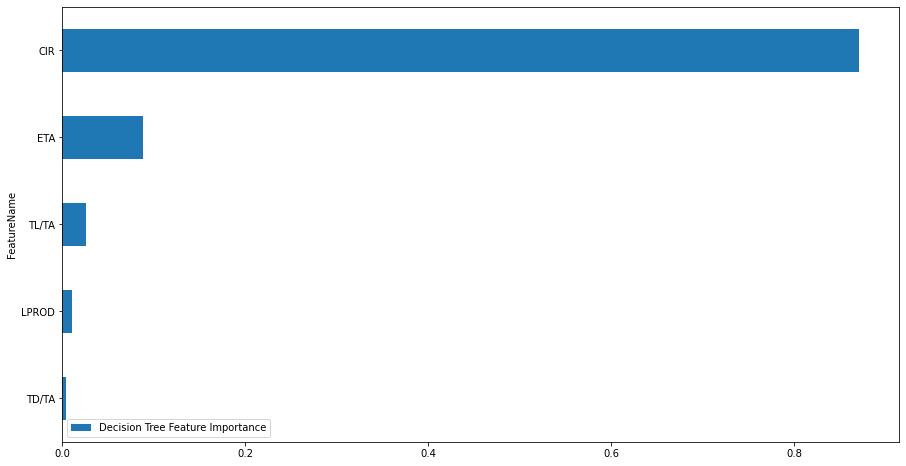

In [289]:
features_importances_dt.sort_values("Decision Tree Feature Importance").plot(figsize=(15,8), x="FeatureName", y=["Decision Tree Feature Importance"], kind="barh")

# Using Random Forest to predict

a) Thoery

Random forest is a type of ensemble learning that builds multiple decision trees during training. For classification tasks, the algorithm outputs the class that is the mode of the classes predicted by the individual trees. For regression tasks, it outputs the mean prediction of the individual trees. Rather than relying on just one decision tree, the algorithm uses the majority vote from the predictions of all the trees in the forest to determine the final output. Having a larger number of trees in the forest can increase accuracy and help prevent overfitting. The theory behind Random Forest involves using a divide-and-conquer strategy to identify the optimal split points within a tree. This is done through a greedy search algorithm. The process of splitting the data into subsets is repeated recursively in a top-down manner. This continues until all or most of the records have been assigned to specific class labels. Random Forests has many applications in many areas including In Finance, It can be used to assess high credit-risk customers. In Healthcare, Random Forest can be used to predict the likelihood of disease or illness for a certain population. In E-Commerce, Random Forest can be used for product demos, pricing optimization, and ranking search.

Strengths:

- Random forests are able to handle both continuous and categorical variables. 

- They clearly indicate the most important fields for prediction or classification. 

- Random forests are easy to understand, interpret, and visualize. 

- They require less data preparation compared to other machine learning algorithms. 

- Random forests are non-parametric, meaning they make no assumptions about the spatial distribution and the classifier structure. 

Weaknesses:

- Random forests can be prone to overfitting, especially when the tree is too complex. 

- They may have difficulties handling numerical variables with millions of records due to the time complexity of operating this operation. 

b) Running model

In [290]:
RF_regression = RandomForestRegressor( random_state = 0)
RF_regression.fit(X_train, y_train.ravel())

y_predRF = RF_regression.predict(X_test)


In [291]:
scores.append({
        'model': 'Random Forest Regression',
        'r2_score': r2_score(y_test, y_predRF),
    'MAE_score' : mean_absolute_error(y_test,y_predRF),
    'MSE_score' : mean_squared_error(y_test,y_predRF),
    'RMSE_score' : mean_squared_error(y_test,y_predRF, squared=False)
    })

pred=y_predRF

print('Testing R2 Score: ', round(r2_score(y_test, y_predRF),4),
      '\nTesting MAE Score: ', round(mean_absolute_error(y_test,y_predRF),4),
      '\nTesting MSE Score: ', round(mean_squared_error(y_test,y_predRF),4),
      '\nTesting RMSE Score: ', round(mean_squared_error(y_test,y_predRF, squared=False),4))

Testing R2 Score:  0.9237 
Testing MAE Score:  0.1578 
Testing MSE Score:  0.0589 
Testing RMSE Score:  0.2426


In [292]:
importance_rf = RF_regression.feature_importances_
features_importances_rf = pd.DataFrame({'FeatureName': data1.loc[:,features].columns, 'Random Forest Feature Importance': importance_rf})
features_importances_rf.sort_values(by=['Random Forest Feature Importance'], ascending=False)

FeatureName  Random Forest Feature Importance
4         CIR                          0.781127
2         ETA                          0.082483
0       TL/TA                          0.048763
1       TD/TA                          0.044066
3       LPROD                          0.043562

<AxesSubplot:ylabel='FeatureName'>

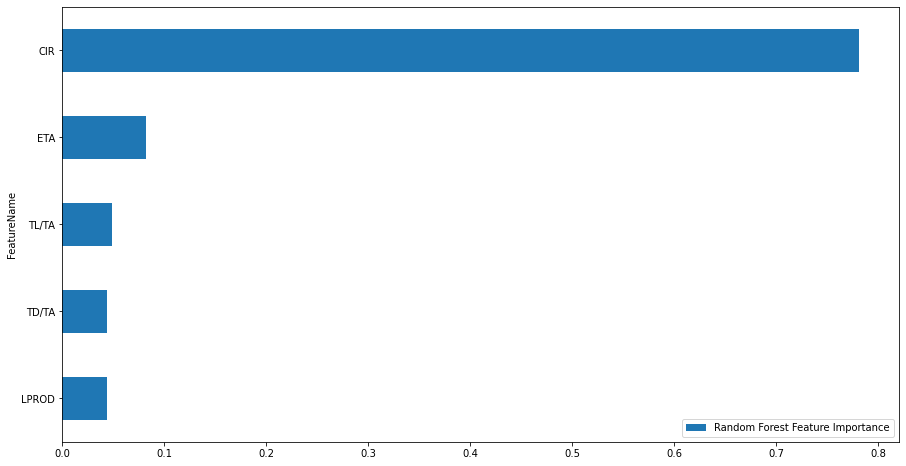

In [293]:
features_importances_rf.sort_values("Random Forest Feature Importance").plot(figsize=(15,8), x="FeatureName", y=["Random Forest Feature Importance"], kind="barh")

# Using SVM to predict

a) Thoery

Support Vector Machine (SVM) is a supervised machine learning algorithm that can be applied to both classification and regression problems. It operates by identifying the optimal hyperplane that separates data points in n-dimensional space into distinct classes. SVMs are effective in high-dimensional spaces and remain effective even when the number of dimensions exceeds the number of samples. They use a subset of training points, called support vectors, in the decision function, making them memory efficient. They are also versatile, as different kernel functions can be used in the decision function. Some of the fields where SVMs are used the most include Image-based analysis and classification tasks (such as facial feature extraction and recognition), and Geospatial data-based applications (such as inversion problem), Text-based applications (such as email spam classification), Computational biology, and SVMs can also be used for regression and outlier detection. The applications of SVMs are not limited to these categories, as it is a versatile algorithm with many uses.

Strengths:

- SVMs are effective in high-dimensional spaces and remain effective even when the number of dimensions exceeds the number of samples.

- SVMs use a subset of training points, called support vectors, in the decision function, making them memory efficient.

- SVMs are also versatile, as different kernel functions can be used in the decision function.

Weaknesses:

- When the number of features significantly exceeds the number of samples, it is important to avoid over-fitting by carefully selecting kernel functions and the regularization term.

- SVMs do not directly provide probability estimates; these must be calculated using an expensive five-fold cross-validation process.

b) Running model

In [294]:
svm_regressor = SVR(kernel = 'rbf')
svm_regressor.fit(X_train, y_train.ravel())
y_predsvm = svm_regressor.predict(X_test)

In [295]:
scores.append({
        'model': 'SVM Regression',
        'r2_score': r2_score(y_test, y_predsvm),
    'MAE_score' : mean_absolute_error(y_test,y_predsvm),
    'MSE_score' : mean_squared_error(y_test,y_predsvm),
    'RMSE_score' : mean_squared_error(y_test,y_predsvm, squared=False)
    })

pred=y_predsvm

print('Testing R2 Score: ', round(r2_score(y_test, y_predsvm),4),
      '\nTesting MAE Score: ', round(mean_absolute_error(y_test,y_predsvm),4),
      '\nTesting MSE Score: ', round(mean_squared_error(y_test,y_predsvm),4),
      '\nTesting RMSE Score: ', round(mean_squared_error(y_test,y_predsvm, squared=False),4))

Testing R2 Score:  0.9292 
Testing MAE Score:  0.1536 
Testing MSE Score:  0.0546 
Testing RMSE Score:  0.2337


# Using KNN to predict

a) Thoery 

KNeighborsRegressor is a regression algorithm based on k-nearest neighbors. It works by finding the k closest data points to the data point to be predicted in the training set and predicting the target value by calculating the weighted average of the target values of those k nearest neighbors.The weight of each neighbor can be calculated in several different ways. One common way is to use uniform weights, where each neighbor is assigned equal weight. Another way is to use distance-based weights, where the weight of each neighbor is calculated based on its distance to the data point to be predicted. In this case, closer neighbors will have a greater influence than farther neighbors.

Strengths:

- Ability to handle non-linear data: KNeighborsRegressor can handle non-linear data well and adapt to complex models.

- Easy to understand and interpret: KNeighborsRegressor is a simple and easy-to-understand algorithm. Its results are also easy to interpret and explain.

Weaknesses:

- Curse of dimensionality: The accuracy of KNeighborsRegressor may decrease as the dimensionality of the data increases.

- Computational speed: Computation may become slow when the size of the dataset is large.

b) Running model

In [296]:
rmse_val = []
for K_value in range (1, 30):
    neigh = KNeighborsRegressor(n_neighbors = K_value)
    neigh.fit(X_train, y_train)
    pred = neigh.predict(X_test)
    error = np.sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)
    print('RMSE is', error, '% for k_value:', K_value)
   

RMSE is 0.3541193650263408 % for k_value: 1
RMSE is 0.27199256751072803 % for k_value: 2
RMSE is 0.2732261720967421 % for k_value: 3
RMSE is 0.258232953332955 % for k_value: 4
RMSE is 0.24189983058441822 % for k_value: 5
RMSE is 0.2753032993606171 % for k_value: 6
RMSE is 0.2772649082826969 % for k_value: 7
RMSE is 0.28527161609089563 % for k_value: 8
RMSE is 0.2856499065479227 % for k_value: 9
RMSE is 0.29108779756651537 % for k_value: 10
RMSE is 0.3035849346501754 % for k_value: 11
RMSE is 0.3144398449481364 % for k_value: 12
RMSE is 0.3129504585548857 % for k_value: 13
RMSE is 0.3273808504835052 % for k_value: 14
RMSE is 0.3322544930850043 % for k_value: 15
RMSE is 0.3381283305080174 % for k_value: 16
RMSE is 0.345745229758287 % for k_value: 17
RMSE is 0.35147223567541436 % for k_value: 18
RMSE is 0.35366269662871685 % for k_value: 19
RMSE is 0.3602642377427975 % for k_value: 20
RMSE is 0.36950827039276257 % for k_value: 21
RMSE is 0.37857778117965774 % for k_value: 22
RMSE is 0.381

<AxesSubplot:>

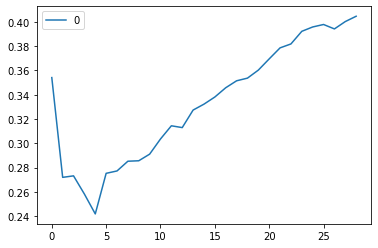

In [297]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [298]:
knn_regression = KNeighborsRegressor(n_neighbors=5)
knn_regression.fit(X_train,y_train.ravel())
y_predknn = knn_regression.predict(X_test)

In [299]:
scores.append({
        'model': 'KNeighborsRegressor',
        'r2_score': r2_score(y_test, y_predknn),
    'MAE_score' : mean_absolute_error(y_test,y_predknn),
    'MSE_score' : mean_squared_error(y_test,y_predknn),
    'RMSE_score' : mean_squared_error(y_test,y_predknn, squared=False)
    })

pred=y_predknn

print('Testing R2 Score: ', round(r2_score(y_test, y_predknn),4),
      '\nTesting MAE Score: ', round(mean_absolute_error(y_test,y_predknn),4),
      '\nTesting MSE Score: ', round(mean_squared_error(y_test,y_predknn),4),
      '\nTesting RMSE Score: ', round(mean_squared_error(y_test,y_predknn, squared=False),4))

Testing R2 Score:  0.9242 
Testing MAE Score:  0.1891 
Testing MSE Score:  0.0585 
Testing RMSE Score:  0.2419


# Models evaluation

In [300]:
Score = pd.DataFrame(scores,columns=['model','r2_score','MAE_score','MSE_score','RMSE_score'])
Score.sort_values('r2_score',ascending=False,inplace=True)
Score

model  r2_score  MAE_score  MSE_score  RMSE_score
3            SVM Regression  0.929200   0.153596   0.054630    0.233730
4       KNeighborsRegressor  0.924164   0.189086   0.058516    0.241900
2  Random Forest Regression  0.923725   0.157750   0.058855    0.242600
0         Linear Regression  0.875645   0.232983   0.095953    0.309763
1  Decision Tree Regression  0.839953   0.224303   0.123494    0.351417

                      model  r2_score  MAE_score  MSE_score  RMSE_score
3            SVM Regression  0.929200   0.153596   0.054630    0.233730
4       KNeighborsRegressor  0.924164   0.189086   0.058516    0.241900
2  Random Forest Regression  0.923725   0.157750   0.058855    0.242600
0         Linear Regression  0.875645   0.232983   0.095953    0.309763
1  Decision Tree Regression  0.839953   0.224303   0.123494    0.351417


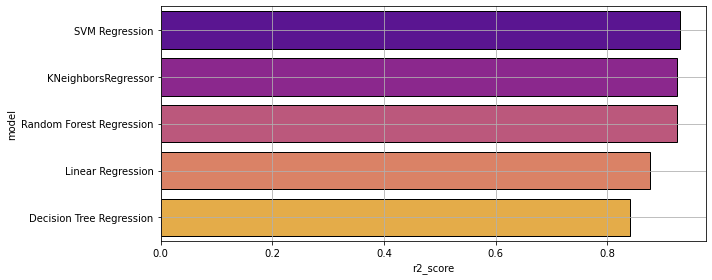

In [301]:
Score = pd.DataFrame(scores,columns=['model','r2_score','MAE_score','MSE_score','RMSE_score'])
Score.sort_values('r2_score',ascending=False,inplace=True)
print(Score)
plt.figure(figsize=(10,4))
sns.barplot(y=Score['model'],x=Score['r2_score'],palette='plasma',edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

Comment:

Based on the results table above, it seems that all of the models performed relatively well on the test data. The SVM Regression model appears to be the best model among those listed. It has the highest r2_score value (0.929200), indicating that this model is better at explaining the variability of the data than other models, it can explain 92.92% of the variance in the target variable. In addition, it also has the lowest mean absolute error score (MAE_score) of 0.153596, mean squared error score (MSE_score) of 0.054630, and root mean squared error score (RMSE_score) of 0.233730, indicating that this model has higher accuracy and lower prediction error than other models. The KNeighborsRegressor and Random Forest Regression models also performed well, with R2 scores above 0.92 and relatively low error scores. The Linear Regression and Decision Tree Regression models had lower R2 scores and higher error scores compared to the other models, but still performed reasonably well.

Some possible reasons that could explain why the SVM Regression model performed the best:
The SVM Regression model may have been able to better capture the underlying relationships between the input variables and the target variable compared to the other models. The hyperparameters of the SVM Regression model have been tuned more effectively than those of the other models, resulting in better performance. And the data may have characteristics that make it particularly well-suited for modeling with an SVM Regression model.

# Kmeans Clustering 

a) Thoery

The k-means algorithm is an iterative clustering algorithm that aims to partition the dataset into K pre-defined distinct non-overlapping subgroups (clusters) where each data point belongs to only one group. It tries to make the intra-cluster data points as similar as possible while also keeping the clusters as different (far) as possible. It assigns data points to a cluster such that the sum of the squared distance between the data points and the cluster’s centroid (arithmetic mean of all the data points that belong to that cluster) is at the minimum. The less variation we have within clusters, the more homogeneous (similar) the data points are within the same cluster.

The way k-means algorithm works is as follows:

- Specify number of clusters K.
- Initialize centroids by first shuffling the dataset and then randomly selecting K data points for the centroids without replacement.
- Keep iterating until there is no change to the centroids. i.e assignment of data points to clusters isn’t changing.
- Compute the sum of the squared distance between data points and all centroids.
- Assign each data point to the closest cluster (centroid).

Some strengths of the k-means algorithm include:

- Simplicity and ease of understanding: The k-means algorithm is simple and easy to understand.
- Effectiveness in clustering: The k-means algorithm can give accurate clustering results in many cases.

However, the k-means algorithm also has some weaknesses:

- Assumption about the number of clusters: The number of clusters k must be determined beforehand and can affect the clustering result.
- Not working well with non-linear data: The k-means algorithm does not work well with non-linear data. In this case, other algorithms may give better results

b) Running model

In [236]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import scipy.stats as stats

In [237]:
# Removing outliers
z = np.abs(stats.zscore(data1))
data_clean = data1[(z<3).all(axis=1)]
Q1 = data1.quantile(q=.25)
Q3 = data1.quantile(q=.75)
IQR = data1.apply(stats.iqr)
data_clean = data1[~((data1 < (Q1-1.5*IQR)) | (data1 > (Q3+1.5*IQR))).any(axis=1)]

In [238]:
#Scaling data
sc = StandardScaler()
dt = sc.fit_transform(data_clean)
dt

array([[ 0.4159027 , -0.08166762, -1.68011797, ..., -0.14619085,
        -0.1488173 , -0.16038305],
       [-0.35479445, -0.59184076, -0.88467433, ..., -0.7108997 ,
        -1.21938797, -0.53660295],
       [-0.17962782, -0.58384553, -0.83223449, ..., -0.49521745,
        -0.08748543, -1.15819296],
       ...,
       [-0.22422624,  0.52621679, -0.40602496, ..., -0.45625828,
         0.43720765, -0.95936395],
       [-0.32270235,  1.27993503, -0.33110273, ..., -0.58471408,
         0.19966853, -0.55865549],
       [ 0.30649382,  2.21164897,  2.45868891, ..., -0.19974702,
         0.25514611,  0.48240926]])

In [239]:
from sklearn.cluster import KMeans

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

Text(0.5, 1.0, 'Elbow Method For Optimal k')

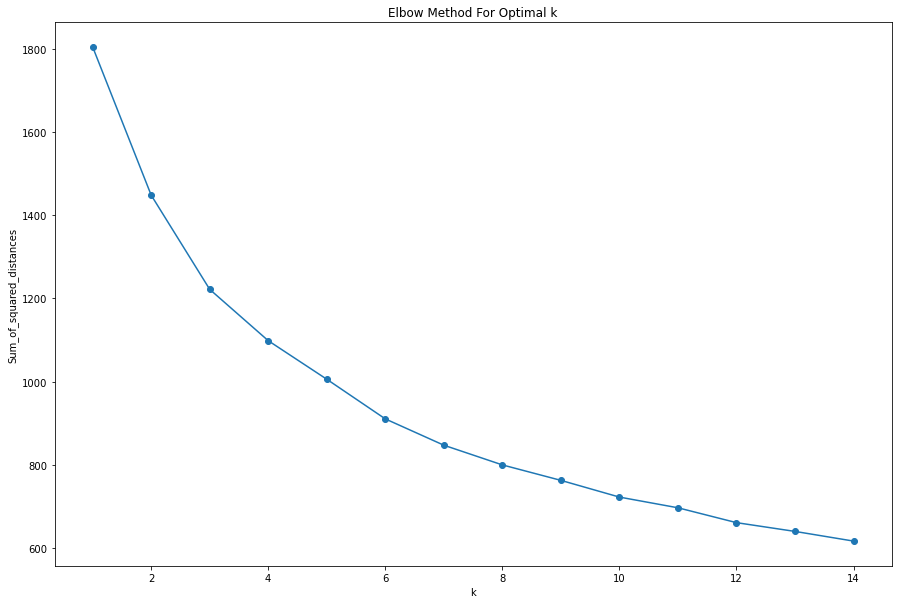

In [240]:
#Elbow method
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k, max_iter=300, random_state=None)
    km = km.fit(dt)
#Get sum of square distances by applying km.inertia_ 
    Sum_of_squared_distances.append(km.inertia_)
#Plot Results
plt.figure(figsize=(15,10))
plt.plot(K, Sum_of_squared_distances, marker='o')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')

In [241]:
for n_cluster in range(2,11):
    kmeans = KMeans(n_clusters=n_cluster, max_iter=300, random_state=None).fit(dt)
    label = kmeans.labels_
    sil_coef = silhouette_score(dt,label,metric="euclidean")
    print(f"For n_clusters={n_cluster}, The Silhouette Coeff is {sil_coef}")

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

For n_clusters=2, The Silhouette Coeff is 0.198136293197236
For n_clusters=3, The Silhouette Coeff is 0.20407711606231746
For n_clusters=4, The Silhouette Coeff is 0.1739941171883025
For n_clusters=5, The Silhouette Coeff is 0.18986817061824235
For n_clusters=6, The Silhouette Coeff is 0.17244863219689197
For n_clusters=7, The Silhouette Coeff is 0.1731256869663241
For n_clusters=8, The Silhouette Coeff is 0.17511616374257072
For n_clusters=9, The Silhouette Coeff is 0.1824691964661713
For n_clusters=10, The Silhouette Coeff is 0.18535767724985444


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

Comment:
    
Since kmeans is an algorithm that works based on distance, it is very sensitive to outliers. Therefore, we proceed to remove outliers and then scale the data and run the elbow method as well as the silhouette coefficient to determine the optimal number of clusters. The result shows that the optimal number of clusters is 3, so we proceed to divide commercial banks into 3 corresponding clusters.

In [242]:
from sklearn import svm
import glob
import os
from PIL import Image
from sklearn.decomposition import PCA

In [243]:
km = KMeans(n_clusters=3, max_iter=300, random_state=None) #điều chỉnh số cụm muốn chia
km.fit(dt)
labels = km.labels_
km.cluster_centers_.shape

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


(3, 11)

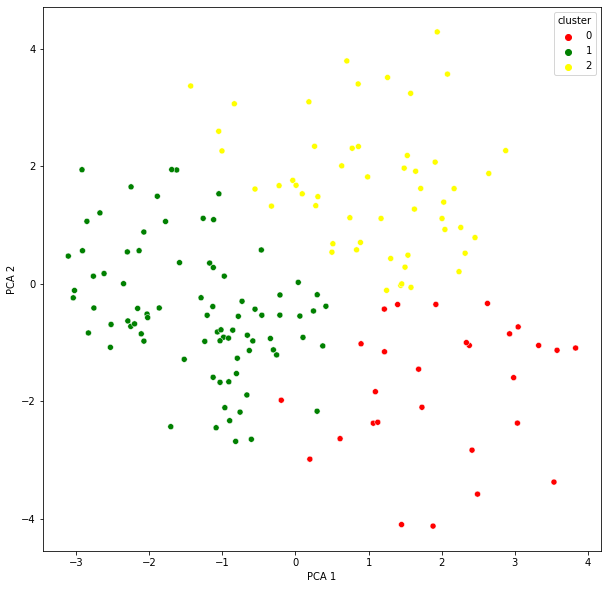

In [244]:
pca = PCA(n_components=2) #fixed = 2
principal_comp = pca.fit_transform(dt)
pca_df = pd.DataFrame(principal_comp,columns=['PCA 1','PCA 2'])
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="PCA 1", y="PCA 2", hue = "cluster", data = pca_df, palette =['red','green','yellow']) #thêm đủ màu tương ứng với số lượng cụm

In [245]:
data_clean['Cluster']=labels
data_clean

C:\Users\ASUS\AppData\Local\Temp/ipykernel_10264/1520800091.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Cluster']=labels


ROA        ER        BR       Size        ETA      NPLR        CIR  \
0    1.305116  0.025234  0.000554  17.453510  12.237603  1.063410  80.819330   
1    0.739123  0.015506  0.007212  17.542215  11.369445  1.596018  91.392149   
2    0.867764  0.015658  0.007651  17.644449  10.649538  2.835047  88.742184   
4    0.173384  0.014592  0.008158  18.027117   8.471635  3.968844  96.240567   
5    0.141793  0.016591  0.024354  17.980231   8.994624  2.121991  96.998033   
..        ...       ...       ...        ...        ...       ...        ...   
287  0.961948  0.019546  0.010791  18.235942   7.212910  1.076538  89.678342   
288  0.694283  0.024490  0.011203  18.450757   6.510326  2.718691  90.984787   
289  0.835011  0.036825  0.011218  18.618458   6.340162  2.809568  88.114230   
290  0.762691  0.051197  0.011846  18.917597   5.463643  2.537601  87.636384   
291  1.224767  0.068963  0.035196  19.091675   6.844415  2.692578  82.788333   

         LLPR       LPROD     TD/TA     TL/TA  Cluster  
0    1.063410  192.766537  0.617043  0.522860        2  
1    1.596018  114.441297  0.487448  0.479407        1  
2    2.205230  144.356471  0.624467  0.407613        1  
4    1.823933   43.195347  0.668536  0.384929        1  
5    1.244762   29.350161  0.738332  0.480240        1  
..        ...         ...       ...       ...      ...  
287  1.076538  236.454169  0.353800  0.351051        2  
288  1.030211  165.390892  0.577509  0.358099        1  
289  1.152391  149.760118  0.687982  0.430578        1  
290  1.432963  131.943269  0.659228  0.476860        1  
291  1.491191  185.338284  0.665943  0.597103        0  

[164 rows x 12 columns]

<AxesSubplot:xlabel='Cluster'>

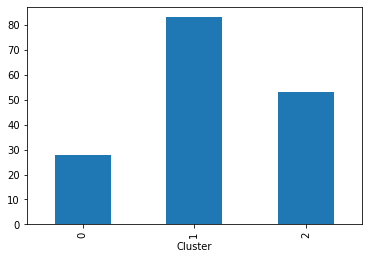

In [246]:
data_clean.groupby('Cluster').size().plot(kind='bar')

In [247]:
t = data_clean.groupby('Cluster').describe().T


In [248]:
from IPython.display import display, HTML

In [249]:
display(HTML(t.to_html()))

Comment:

- The group with the highest ROA (cluster 2) has the highest Equity to Total Assets Ratio (ETA), but has the fewest number of branches compared to other groups. The Cost to Income Ratio (CIR) is also the lowest, which is consistent with the observation above that banks that manage costs well will generate high profits. In addition, Deposit Activity (TD/TA) and Lending Activity (TL/TA) are also the lowest. This shows that banks with low ratios mean they invest less in loans and investments.
- The group with moderate ROA (cluster 0) has the highest number of employees and branches, and the bank’s scale is also the largest. In addition, Loan Loss Provisions Ratio (LLPR), Labor productivity (LPROD), Deposit Activity (TD/TA) and Lending Activity (TL/TA) are also the highest. However, this group has the lowest Equity to Total Assets Ratio (ETA) and Non-Performing Loans Ratio (NPLR).
- The group with the lowest ROA (cluster 1) has the highest Non-Performing Loans Ratio (NPLR) and Cost to Income Ratio (CIR) among the 3 groups. However, this group has the fewest number of employees and the lowest Loan Loss Provisions Ratio (LLPR) and Labor productivity (LPROD).

=> From here, we see that the ability to manage costs of banks is very important because it has a very strong correlation with ROA. Therefore, if banks want to improve their profitability, they should reduce costs and improve their cost control ability. In addition, banks with low profitability will have a lower ability to withstand future losses and are more vulnerable, including unexpected losses exceeding provisions for loans and lower Labor productivity.

# V) Conclusion

Machine Learning has many benefits for businesses and individuals. One of the main benefits is the ability to analyze and process large amounts of data quickly and accurately. This allows businesses to make decisions based on real data and improve operational performance. Machine Learning also helps automate processes and minimize human intervention, saving time and costs. In addition, Machine Learning helps improve customer experience by providing personalized services and making recommendations that meet the needs of each individual. Currently, banks are also pushing for digital transformation by increasingly applying technology, including machine learning, to help solve problems automatically, quickly, save time and costs, improve bank performance and contribute to the introduction of more new products that meet the increasing needs of customers. 
This project also shows the potential application of machine learning algorithms in predicting the profitability of commercial banks in Vietnam is very stable. The results show that the algorithms work well, especially the SVM Regression model and Kmeans also cluster well and provide many interesting and useful insights about commercial banks in Vietnam. The next research direction should expand the sample to more banks and test more algorithms as well as apply other techniques to improve the quality of the model even more.


